# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
import os

# changing working directory to ThinkStats2/code folder
path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 530 - Data Exploration and Analysis\\ThinkStats2\\code'
os.chdir(path)

In [3]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [5]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [6]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [7]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [8]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [7]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [9]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [10]:
hist[4]

0

The `Values` method returns the values:

In [11]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [12]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [13]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

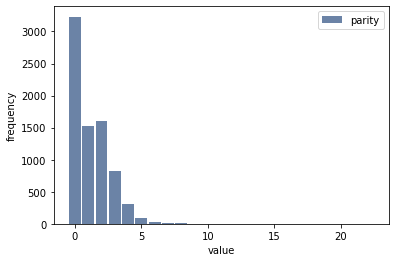

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [16]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

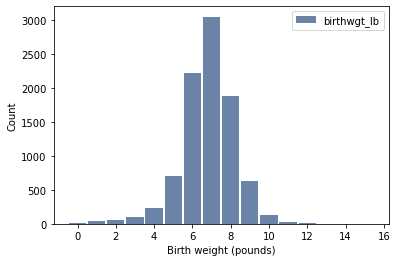

In [18]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [19]:
ages = np.floor(live.agepreg)

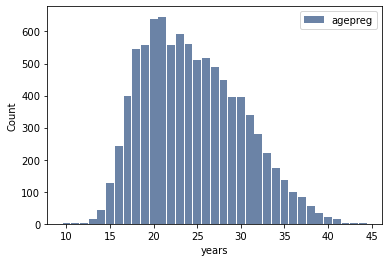

In [20]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

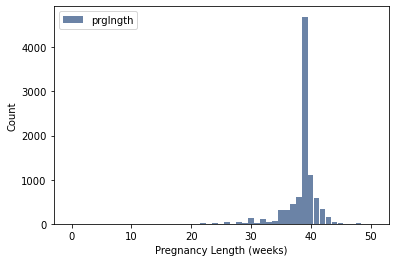

In [22]:
# Solution goes here
hist = thinkstats2.Hist(live['prglngth'], label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Pregnancy Length (weeks)', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [23]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 15
1 9
2 78
3 151
4 412
5 181
6 543
7 175
8 409
9 594


Use `Largest` to display the longest pregnancy lengths.

In [24]:
# Solution goes here
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 591
40 1120


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [45]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

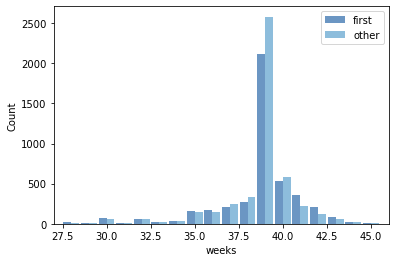

In [26]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [28]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print(f"""
prglngth mean: {mean}
prglngth var: {var}
prglgnth std: {std}
""")


prglngth mean: 38.56055968517709
prglngth var: 7.302662067826851
prglgnth std: 2.702343810070593



Here are the mean and standard deviation:

In [29]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [33]:
# Solution goes here
import math

var = live.prglngth.var()
std = live.prglngth.std()

sqrt_var = math.sqrt(var)

print(f"""
prglngth standard deviation: {std}
prglngth sqrt(variance): {sqrt_var}
std = variance: {std==sqrt_var}
""")


prglngth standard deviation: 2.702343810070593
prglngth sqrt(variance): 2.702343810070593
std = variance: True



Here's are the mean pregnancy lengths for first babies and others:

In [34]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [34]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [64]:
# Solution goes here
live = preg[preg.outcome == 1]  # where baby was a live birth
firsts_prglngth = live[live.birthord == 1][['prglngth']]  # where baby was first live birth
others_prglngth = live[live.birthord != 1][['prglngth']]  # where baby was not first live birth

cohen_d = abs(round(CohenEffectSize(firsts_prglngth, others_prglngth).iloc[0],3))

print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.029


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

<span style="color:yellow">
    <u>Answer</u>: After analysis on our sample data, it was found that first births had a larger effect on birth weight (<i>d = .089</i>) than for pregnancy length (<i>d = .029</i>).
</span>

In [60]:
# Solution goes here
live_df = preg[preg.outcome == 1][['totalwgt_lb']]  # where baby was a live birth
firsts_wgt_df = live[live.birthord == 1][['totalwgt_lb']]  # where baby was first live birth
others_wgt_df = live[live.birthord != 1][['totalwgt_lb']]  # where baby was not first live birth

live_mean = round(live_df.mean().iloc[0], 3)
firsts_mean = round(firsts_wgt_df.mean().iloc[0], 3)
others_mean = round(others_wgt_df.mean().iloc[0], 3)

print(f"""
Live birth mean weight: {live_mean} lbs
First live birth mean weight: {firsts_mean} lbs
Non-First live birth mean weight: {others_mean} lbs

Based on average weights for live births, first births weigh less than non-first births.""")



Live birth mean weight: 7.266 lbs
First live birth mean weight: 7.201 lbs
Non-First live birth mean weight: 7.326 lbs

Based on average weights for live births, first births weigh less than non-first births.


In [68]:
# Solution goes here
live_df = preg[preg.outcome == 1][['totalwgt_lb']]  # where baby was a live birth
firsts_wgt_df = live[live.birthord == 1][['totalwgt_lb']]  # where baby was first live birth
others_wgt_df = live[live.birthord != 1][['totalwgt_lb']]  # where baby was not first live birth

print(f"{abs(round(CohenEffectSize(firsts_wgt_df, others_wgt_df).iloc[0], 3))}")

0.089


For the next few exercises, we'll load the respondent file:

In [10]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

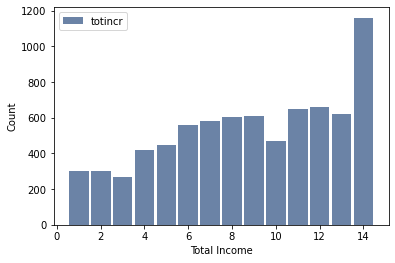

In [73]:
# Solution goes here
var = 'totincr'
xlab = 'Total Income'
hist = thinkstats2.Hist(resp[var], label=var)
thinkplot.Hist(hist)
thinkplot.Config(xlabel=xlab, ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

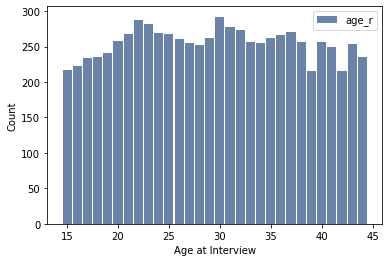

In [74]:
# Solution goes here
var = 'age_r'
xlab = 'Age at Interview'
hist = thinkstats2.Hist(resp[var], label=var)
thinkplot.Hist(hist)
thinkplot.Config(xlabel=xlab, ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

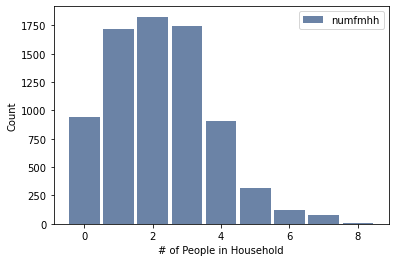

In [75]:
# Solution goes here
var = 'numfmhh'
xlab = '# of People in Household'
hist = thinkstats2.Hist(resp[var], label=var)
thinkplot.Hist(hist)
thinkplot.Config(xlabel=xlab, ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

<span style="color:yellow">
    <u>Answer</u>: This distribution is positively skewed meaning there are heavy tails towards the right side of the graph. It actually seems to take on more of an exponential distribution to me and also there is a slight secondary hump at 2 children borne making it somewhat bi-modal.  
</span>

0 3230
2 1603
1 1519
3 828
4 309
5 95
6 29
7 15
8 8
10 3
9 2
22 1
16 1


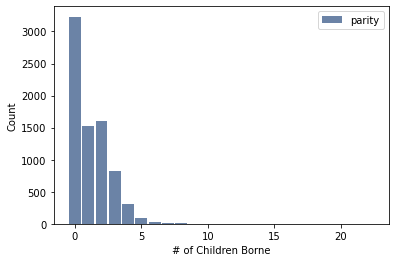

In [21]:
# Solution goes here
var = 'parity'
xlab = '# of Children Borne'
hist = thinkstats2.Hist(resp[var], label=var)
thinkplot.Hist(hist)
thinkplot.Config(xlabel=xlab, ylabel='Count')

for children, freq in hist.Items():
    print(children, freq)

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [78]:
# Solution goes here
for children, freq in hist.Largest(10):
    print(children, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

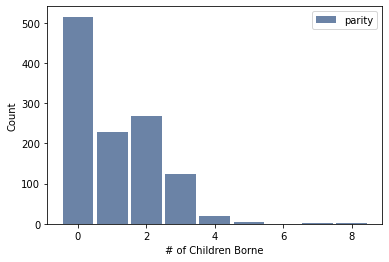

In [26]:
# Solution goes here
high_income_df = resp[resp['totincr']==14]

var = 'parity'
xlab = '# of Children Borne'
hist = thinkstats2.Hist(high_income_df[var], label=var)
thinkplot.Hist(hist)
thinkplot.Config(xlabel=xlab, ylabel='Count')

Find the largest parities for high income respondents.

In [27]:
# Solution goes here
for children, freq in hist.Items():
    print(children, freq)

0 515
2 267
1 229
3 123
4 19
5 5
8 1
7 1


Compare the mean <tt>parity</tt> for high income respondents and others.

In [33]:
# Solution goes here
high_income_parity = resp[resp['totincr']==14][['parity']]
other_income_parity = resp[resp['totincr']!=14][['parity']]

high_income_parity_mean = round(high_income_parity.mean().iloc[0], 2)
other_income_parity_mean = round(other_income_parity.mean().iloc[0], 2)

print(f"""
High income mean children borne: {high_income_parity_mean}
Other income mean children borne: {other_income_parity_mean}
""")


High income mean children borne: 1.08
Other income mean children borne: 1.25



Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

<span style="color:yellow">
    <u>Answer</u>: After analysis on our sample data, it was found that high income had an effect size of (<i>d = .125</i>) on children borne. First births had an effect size of (<i>d = .029</i>) on pregnancy length. This means that the effect size for high income on children borne is much higher than the effect size of first births on pregnancy length.
</span>

In [35]:
# Solution goes here
high_income_parity = resp[resp['totincr']==14][['parity']]
other_income_parity = resp[resp['totincr']!=14][['parity']]

print(f"{abs(round(CohenEffectSize(high_income_parity, other_income_parity).iloc[0], 3))}")

0.125
